In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

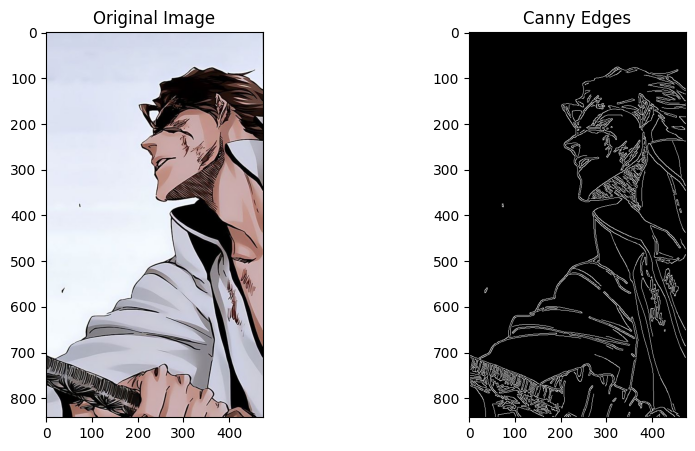

In [5]:

# Load the image
image = cv2.imread('e3bc3bdc51ff9659773cdf9caae5dd8a.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Plot the original image and edges
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib

plt.subplot(1, 2, 2)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')

plt.show()

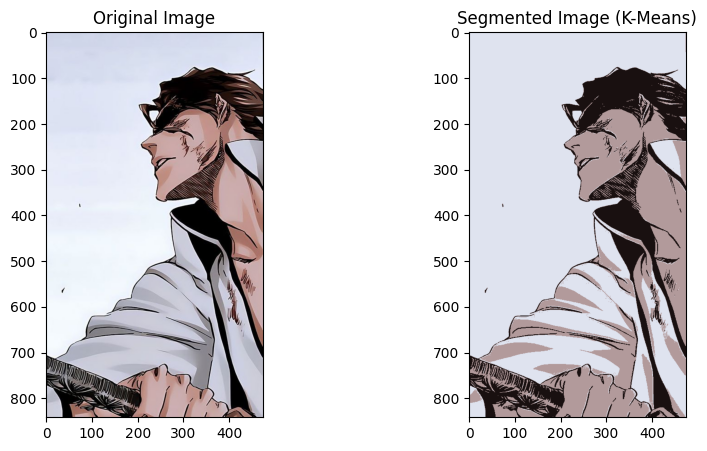

In [6]:
from sklearn.cluster import KMeans

# Reshape the image to a 2D array of pixels
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Apply KMeans clustering
k = 3  # Number of clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Plot the original image and segmented image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Segmented Image (K-Means)')
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

plt.show()

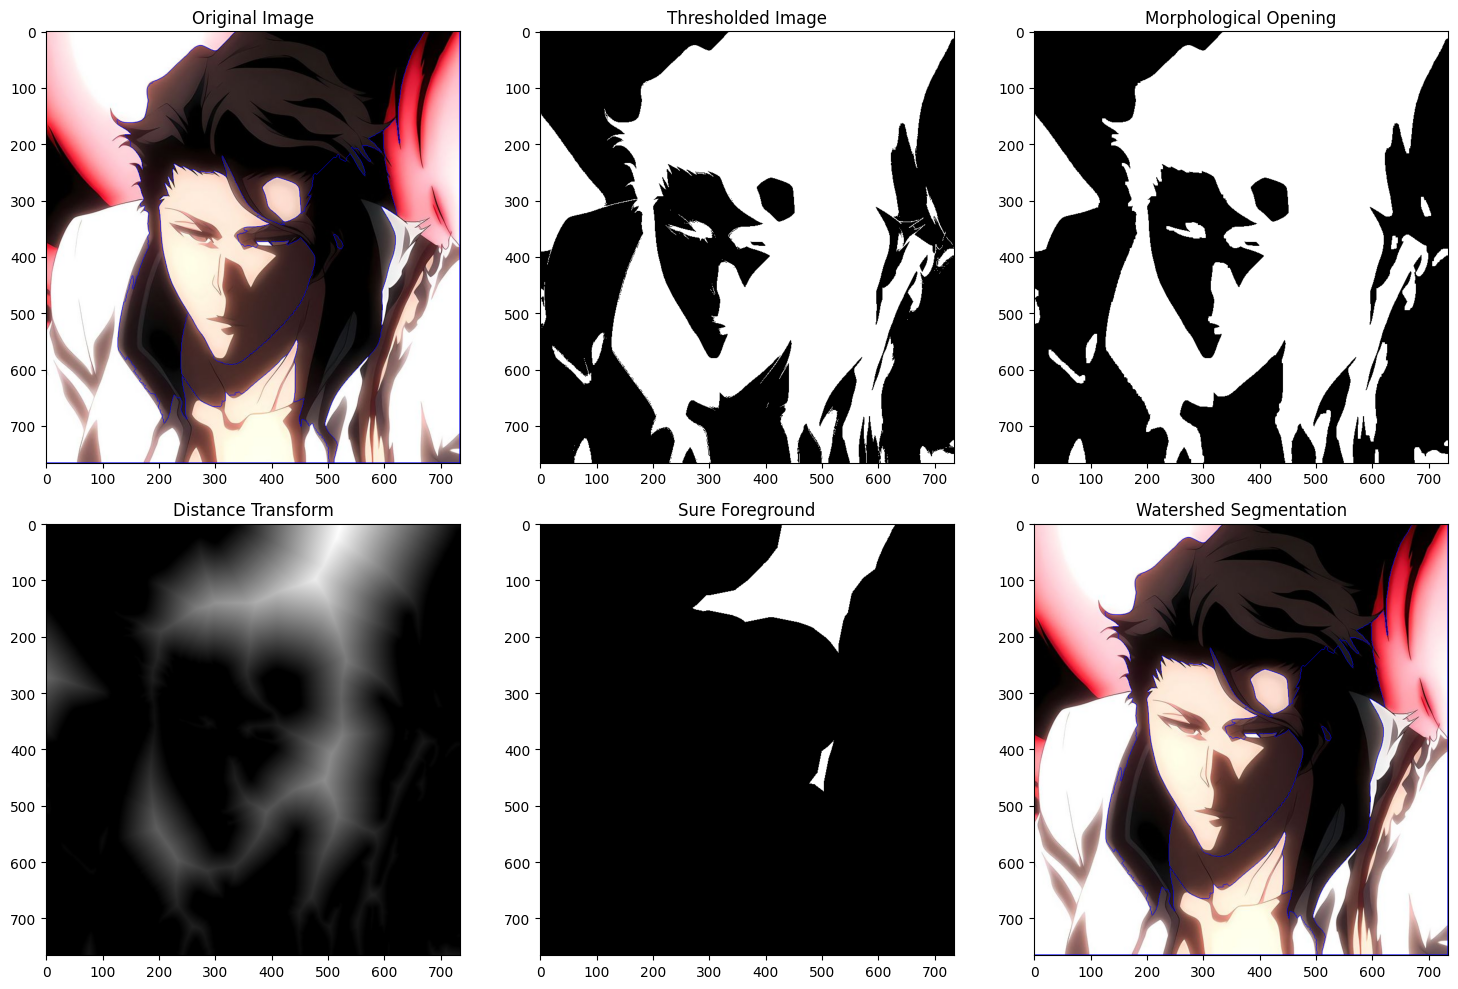

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '21cba8b2cb748c824db6f2ea0863d6c9.jpg'  # Ensure this path is correct
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}. Please check the file path.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Remove noise using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Compute the distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)  # Adjusted threshold

    # Find unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(opening, sure_fg)

    # Label markers for Watershed
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply Watershed algorithm
    markers = cv2.watershed(image, markers)

    # Highlight the boundaries in the original image
    image[markers == -1] = [255, 0, 0]  # Mark boundaries in blue

    # Plot intermediate steps for debugging
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 2)
    plt.title('Thresholded Image')
    plt.imshow(thresh, cmap='gray')

    plt.subplot(2, 3, 3)
    plt.title('Morphological Opening')
    plt.imshow(opening, cmap='gray')

    plt.subplot(2, 3, 4)
    plt.title('Distance Transform')
    plt.imshow(dist_transform, cmap='gray')

    plt.subplot(2, 3, 5)
    plt.title('Sure Foreground')
    plt.imshow(sure_fg, cmap='gray')

    plt.subplot(2, 3, 6)
    plt.title('Watershed Segmentation')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

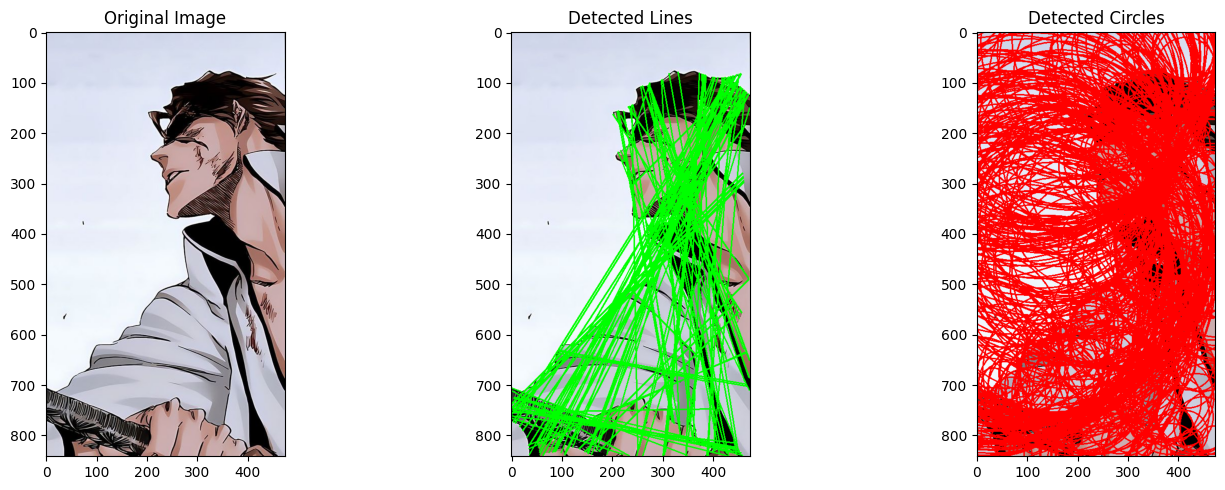

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('e3bc3bdc51ff9659773cdf9caae5dd8a.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

# Create a copy of the original image for drawing lines and circles
image_with_lines = image.copy()
image_with_circles = image.copy()

# Detect lines using Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=68, minLineLength=15, maxLineGap=250)

# Draw detected lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

# Draw detected circles on the image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image_with_circles, (i[0], i[1]), i[2], (0, 0, 255), 2)  # Red circles

# Plot the results
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Image with Detected Lines
plt.subplot(1, 3, 2)
plt.title('Detected Lines')
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))

# Image with Detected Circles
plt.subplot(1, 3, 3)
plt.title('Detected Circles')
plt.imshow(cv2.cvtColor(image_with_circles, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 67.8MB/s]



image 1/1 /content/11d38d09a4fc218e4df4ffd61551343f.jpg: 640x640 1 cat, 448.4ms
Speed: 19.2ms preprocess, 448.4ms inference, 33.5ms postprocess per image at shape (1, 3, 640, 640)


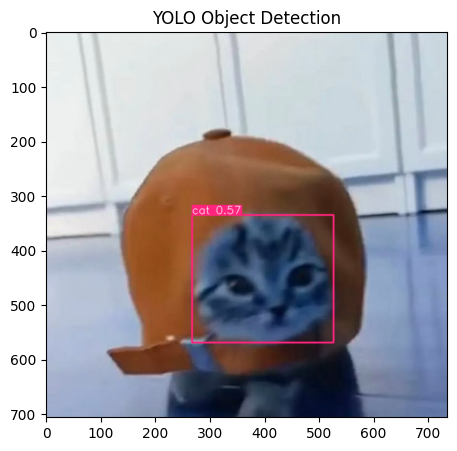

In [11]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLO model
yolo = YOLO('yolov8n.pt')  # Load a pretrained YOLO model

# Perform object detection
results = yolo('11d38d09a4fc218e4df4ffd61551343f.jpg')

# Plot the results
for result in results:
    result.plot()  # This will display the image with bounding boxes
    plt.figure(figsize=(10, 5))
    plt.title('YOLO Object Detection')
    plt.imshow(result.plot())
    plt.show()

In [10]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 113MB/s]


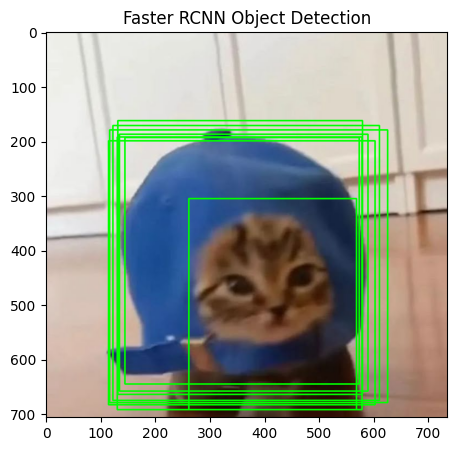

In [12]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
import matplotlib.pyplot as plt

# Load a pre-trained Faster RCNN model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the image
image = cv2.imread('11d38d09a4fc218e4df4ffd61551343f.jpg')
image_tensor = torchvision.transforms.functional.to_tensor(image)

# Perform object detection
with torch.no_grad():
    prediction = model([image_tensor])

# Draw bounding boxes on the image
for box in prediction[0]['boxes']:
    x1, y1, x2, y2 = box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Plot the image with detected objects
plt.figure(figsize=(10, 5))
plt.title('Faster RCNN Object Detection')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()